In [1]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/data/"

A    data/creditcard.zip
A    data/diabetes.csv
A    data/frequencia_palabras.csv
Checked out revision 80.


# Random Forest

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score


df = pd.read_csv("/content/data/diabetes.csv") # cargamos el dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
rename_dict = dict(zip(df.columns.to_list(),col_names))
df.rename(columns=rename_dict, inplace=True)
display(df.tail(4))


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# ----- Definimos las features
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'age']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = RandomForestClassifier(n_estimators)  # Create Decision Tree classifier object

clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.797
Recall: 0.64706
Precision: 0.764


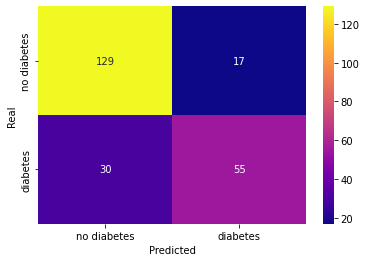

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

In [ ]:
print(f"Número de árboles: {len(clf.estimators_)}")

Número de árboles: 100


⭐ **Ejercicio**:

¿Puedes subir las métricas de desempeño de este clasificador en este dataset? Prueba las siguientes modificaciones:

* Cambiar el conjunto de features, ya sea manualmente o con algún método como [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html), [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), etc.
* Normalizar de datos usando el [escalamiento MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [Normalización](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). ¿Tiene algún efecto considerable?
* Realizar un gridsearch en los principales parámetros del clasificador: 
    * n_estimators
    * max_depth
    * min_samples_split
    * min_samples_leaf

¿Qué estrategia rindió mejores resultados? ¿Cómo se compara, en general, con el decision tree?